**Importing Libraries**

In [1]:
pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

**Gathering Data**

In [3]:
df = pd.read_csv("income.csv")

In [4]:
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [5]:
df.shape

(48842, 15)

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

**Data Cleaning**

In [7]:
df.isnull().sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
df.dropna()

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

**Dropping Null Values**

1. Removing missing values

In [9]:
missingvalues = ["?","NaN","N/a","NA","na"]
df = pd.read_csv("income.csv", na_values=missingvalues)

In [10]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
5   34    Private  198693          10th                6       Never-married   

          occupation   relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct      Own-child  Black   Male             0             0   
1    Farming-fishing        Husband  White   Male             0             0   
2    Protective-serv        Husband  White   Male             0             0   
3  Machine-op-inspct        Husband  Black   Male          7688             0   
5      Other-service  Not-in-family  White   Male             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
5              30  United-States  <=50K

In [13]:
df.shape

(45222, 15)

In [14]:
value = df['income'].isnull().values.any()
print(value)

False


2. Check if there are any duplicate values

In [15]:
df.duplicated().value_counts()

False    45175
True        47
dtype: int64

2(a) Dropping the 47 duplicate values

In [16]:
df = df.drop_duplicates()

In [17]:
display(df.drop_duplicates())

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
5       34       Private  198693          10th                6   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation   relationship   race  gender  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing        Husband  White    Male   
2      Married-civ-spouse    Protective-serv        Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct        Husband  Black    Male   
5           Never-married      Other-service  Not-in-family  White    Male   
...                   ...                ...            ...    ...     ...   
48837  Married-civ-spouse       Tech-support           Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
48839             Widowed       Adm-clerical      Unmarried  White  Female   
48840       Never-married       Adm-clerical      Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
5                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[45175 rows x 15 columns]

In [18]:
df.shape

(45175, 15)

In [19]:
type(df)

pandas.core.frame.DataFrame

2(b) Dropping the column "fnlgwt" as it doesn't provide any insight from that column

In [20]:
df.drop(df.columns[[2]], axis=1, inplace=True)

In [21]:
df.head()

age  workclass     education  educational-num      marital-status  \
0   25    Private          11th                7       Never-married   
1   38    Private       HS-grad                9  Married-civ-spouse   
2   28  Local-gov    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  Some-college               10  Married-civ-spouse   
5   34    Private          10th                6       Never-married   

          occupation   relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct      Own-child  Black   Male             0             0   
1    Farming-fishing        Husband  White   Male             0             0   
2    Protective-serv        Husband  White   Male             0             0   
3  Machine-op-inspct        Husband  Black   Male          7688             0   
5      Other-service  Not-in-family  White   Male             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
5              30  United-States  <=50K

In [22]:
df.shape

(45175, 14)

**Exploratory Data Analysis**

In [23]:
print(df.dtypes)

age                 int64
workclass          object
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


Text(0.5, 1.0, 'Box Plot for Age')

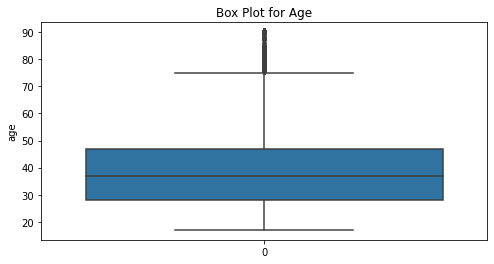

In [24]:
plt.figure(figsize=(8,4))
sns.boxplot(data = df["age"])
plt.ylabel("age")
plt.title("Box Plot for Age")

The median value of age is nearly 38.Also, the values of age is in between 18 and 75 and most of the values are from 28 to 48, which means **most employed persons** have ages in between **28 and 48**.

Text(0.5, 1.0, 'Histogram on Workclass')

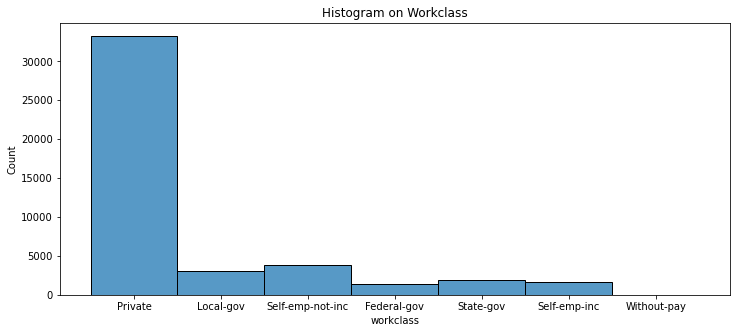

In [25]:
plt.figure(figsize=(12,5))
sns.histplot(data = df, x='workclass')
plt.title("Histogram on Workclass")

Most of the employees are from private sector

<AxesSubplot:ylabel='Categories of Workclass'>

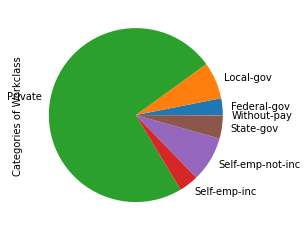

In [26]:
df.groupby('workclass').size().plot(kind='pie', label = "Categories of Workclass")

From the pie-plot, we can derive that most of the employees are from **private sector**.

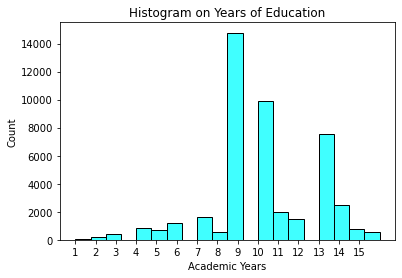

In [27]:
ax = sns.histplot(x= 'educational-num',data = df, color='Cyan',bins=20)
ax.set_xticks(range(1,16))

#specify axis labels
plt.xlabel('Academic Years')
plt.ylabel('Count')
plt.title('Histogram on Years of Education')

#display histogramplot
plt.show()

In [28]:
df['educational-num'].value_counts()

9     14770
10     9887
13     7559
14     2513
11     1958
7      1619
12     1507
6      1223
4       822
15      785
5       676
8       575
16      544
3       447
2       220
1        70
Name: educational-num, dtype: int64

According to the above histogram, nearly **33%** of people have **9 years of academic experience** before starting a job.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Never-married'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'Widowed'),
  Text(3, 0, 'Separated'),
  Text(4, 0, 'Divorced'),
  Text(5, 0, 'Married-spouse-absent'),
  Text(6, 0, 'Married-AF-spouse')])

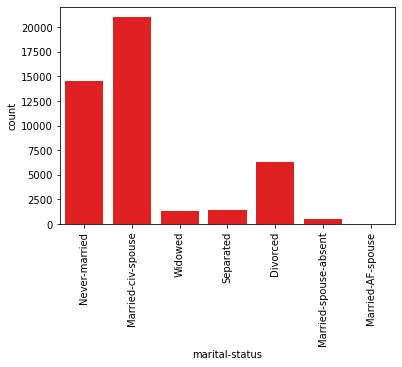

In [29]:
sns.countplot(x= 'marital-status',data = df, color='red')
plt.xticks(rotation=90)

**Married-civ-spouse** means married and is a spouse of civilian are the **highest number** of people with a job.

[Text(0, 0.5, 'Education Background'),
 Text(0.5, 1.0, 'Bar plot on different Educations')]

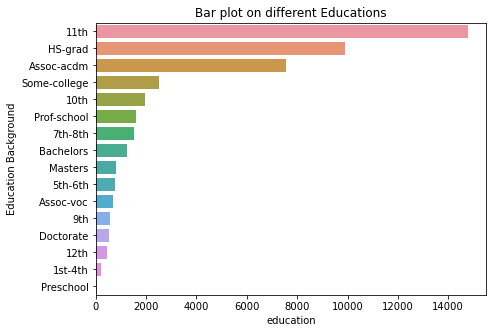

In [30]:
plt.figure(figsize=(7,5))
sns.barplot(y = df['education'].unique(),x = df['education'].value_counts()).set(ylabel = "Education Background",title = "Bar plot on different Educations")

Based on the barplot, the **minimum education** of any person that landed in a job is **11th standard**.

<AxesSubplot:xlabel='age', ylabel='income'>

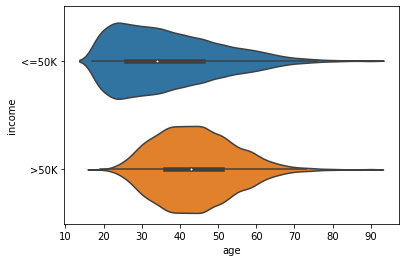

In [31]:
sns.violinplot(y = df['income'], x = df['age'])

Individuals between the ages of **23 and 46** are most likely to have an **income of less than or equal to 50K**, according to the violin plot. Furthermore, people begin **earning more than 50K at the age of 35 and continue to do so until they are 52**.

[Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Occupation'),
 Text(0.5, 1.0, 'Bar plot on different Occupations')]

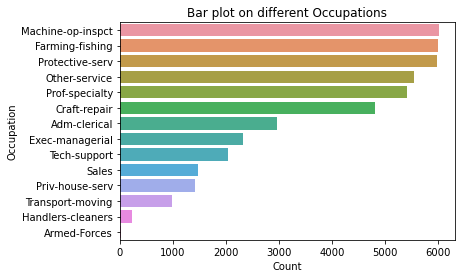

In [32]:
sns.barplot(y = df['occupation'].unique(),x = df['occupation'].value_counts()).set(xlabel = "Count", ylabel = "Occupation",title = "Bar plot on different Occupations")

From the above findings,almost **40% jobs** are available for machine operator and inspector, farming-fishing and Protective Service roles and people working for it.

Text(0.5, 1.0, 'KDE on Capital Loss')

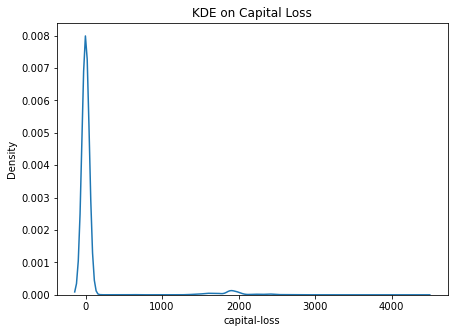

In [33]:
plt.figure(figsize=(7,5))
sns.kdeplot(df['capital-loss'])
plt.title("KDE on Capital Loss")

From the Kernel Density Estimation, it is clear that there are **no outliers** for the Capital loss column. Also, the mean values is near zero which means that there is **no loss incurred by individuals** from the sale of a capital asset, such as a stock, bond, or real estate.

<AxesSubplot:xlabel='age', ylabel='income'>

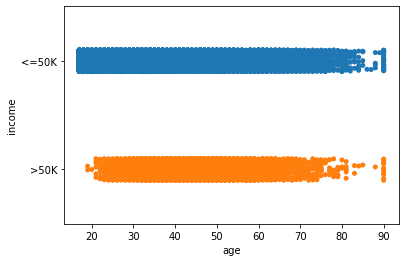

In [34]:
sns.stripplot(x = df['age'], y = df['income'])

From the strip plot, people with **age less than 20 and more than 70** mostly have income less than 50K.

Text(0.5, 1.0, 'Heat Map of all the Quantitative Values')

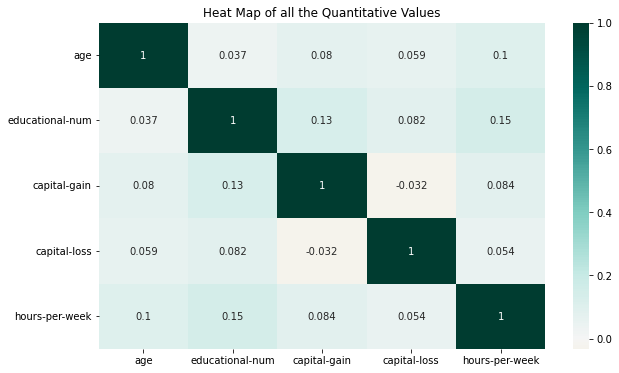

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)
plt.title("Heat Map of all the Quantitative Values")

From the heat map, we can say that there is no much correlation between the quantitative variables, but there is least correlation in few columns which are **educational-num** and **hours-per-week**, **capital-gain** and **educational-num** & **age** and **hours-per-week**.

Text(0.5, 1.0, 'Relation between Age and Hours per Week')

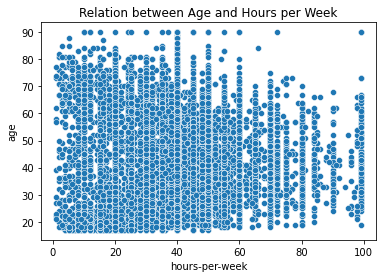

In [36]:
sns.scatterplot(data = df, x ="hours-per-week", y="age")
plt.title("Relation between Age and Hours per Week")

People above **80** years of age spend less time working over week.

Text(0.5, 1.0, 'Line plot on Hours spent on work for a week by an Individual')

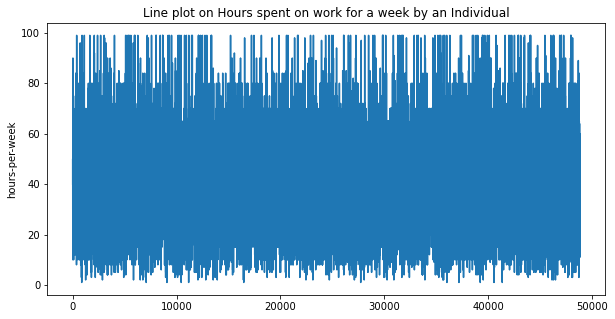

In [37]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df['hours-per-week'])
plt.title("Line plot on Hours spent on work for a week by an Individual")

Almost every individual spends **10 to 70 hours** in a week on their job.

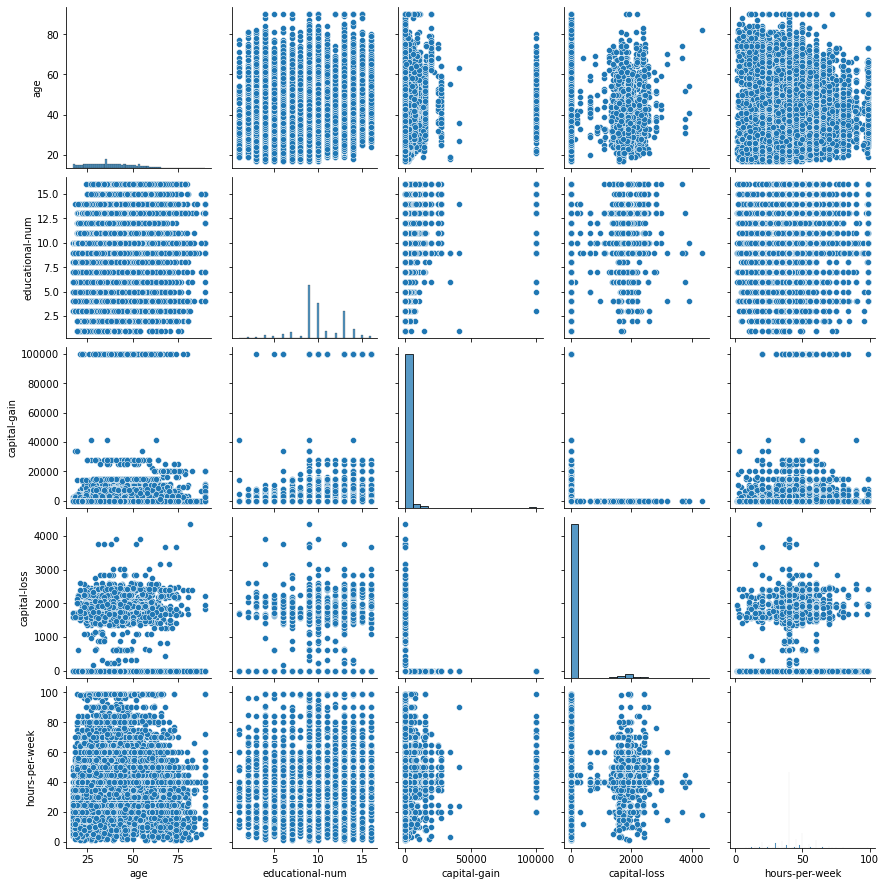

In [38]:
sns.pairplot(data = df)

**API EXTRACTION AND CONVERTING TO VECTORIZED DATA**

In [39]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [40]:
import requests

url = ('https://newsapi.org/v2/everything?''q=adults income&''apiKey=18071091481841b1910d5ae638bfef59')

response = requests.get(url)

print(response.json)

<bound method Response.json of <Response [200]>>


In [41]:
jsontxt = response.json()

In [42]:
response.content

b'{"status":"ok","totalResults":1597,"articles":[{"source":{"id":"business-insider","name":"Business Insider"},"author":"Aaron Mok","title":"Should adults be financially independent by 21? Boomers think so, but Gen Z disagrees.","description":"A majority of parents are making financial sacrifices to support their adult children, a new Bankrate study found.","url":"https://www.businessinsider.com/adults-financially-independent-boomers-gen-z-parents-support-adult-kids-2023-4","urlToImage":"https://i.insider.com/6434388e5a15060019d8b169?width=1200&format=jpeg","publishedAt":"2023-04-10T19:05:59Z","content":"Parents are sacrificing their savings on their adult kids, study finds.PixelsEffect/Getty Images\\r\\n<ul>\\n<li>Baby boomers and Gen Z kids are divided on what age adults should start paying their own bil\xe2\x80\xa6 [+3340 chars]"},{"source":{"id":"business-insider","name":"Business Insider"},"author":"Leo Aquino, CEPF,Lloyd Lee","title":"The parents of an 8-year-old trans girl say t

In [43]:
filename="Adult_Income_Headlines.csv"
MyFILE=open(filename,"w")
WriteThis="Date,Source,Title,Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()

In [44]:
MyFILE=open(filename, "a")

In [45]:
import re
for items in jsontxt["articles"]:
    Source=items["source"]["id"]    
    Date=items["publishedAt"]
    NewDate=Date.split("T")
    Date=NewDate[0]
    ## CLEAN the Title
    ##Replace punctuation with space
    # Accept one or more copies of punctuation         
    # plus zero or more copies of a space
    # and replace it with a single space
    Title=items["title"]
    Title=re.sub(r'[,.;@#?!&$\-\']+', ' ', Title, flags=re.IGNORECASE)
    Title=re.sub(' +', ' ', Title, flags=re.IGNORECASE)
    Title=re.sub(r'\"', ' ', Title, flags=re.IGNORECASE)
    
    # and replace it with a single space
    ## NOTE: Using the "^" on the inside of the [] means
    ## we want to look for any chars NOT a-z or A-Z and replace
    ## them with blank. This removes chars that should not be there.
    Title=re.sub(r'[^a-zA-Z]', " ", Title, flags=re.VERBOSE)
    Title=Title.replace(',', '')
    Title=' '.join(Title.split())
    Title=re.sub("\n|\r", "", Title)
    ##----------------------------------------------------------
    
    Headline=items["description"]
    Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
    ## Be sure there are no commas in the headlines or it will
    ## write poorly to a csv file....
    Headline=Headline.replace(',', '')
    Headline=' '.join(Headline.split())
    Headline=re.sub("\n|\r", "", Headline)
    
    ### AS AN OPTION - remove words of a given length............
    Headline = ' '.join([wd for wd in Headline.split() if len(wd)>3])
    WriteThis=str(Date)+","+str(Source)+","+ str(Title) + "," + str(Headline) + "\n"
    
    MyFILE.write(WriteThis)
    
## CLOSE THE FILE
MyFILE.close()

In [46]:
adult_income_api = pd.read_csv(filename, error_bad_lines=False)
print(adult_income_api.head())
# iterating the columns 
for col in adult_income_api.columns: 
    print(col) 
    
print(adult_income_api["Headline"])

## REMOVE any rows with NaN in them
adult_income_api = adult_income_api.dropna()
print(adult_income_api["Headline"])

### Tokenize and Vectorize the Headlines
## Create the list of headlines
HeadlineLIST = []
for next1 in adult_income_api["Headline"]:
    HeadlineLIST.append(next1)

print("The headline list is")
print(HeadlineLIST)

         Date            Source  \
0  2023-04-10  business-insider   
1  2023-04-07  business-insider   
2  2023-04-01               cnn   
3  2023-03-21              None   
4  2023-03-21  business-insider   

                                               Title  \
0  Should adults be financially independent by Bo...   
1  The parents of an year old trans girl say they...   
2  These states will be the first to kick residen...   
3  How U S Government Agencies Can Fix Their Cust...   
4  The US cities where it s hardest to build affo...   

                                            Headline  
0  majority parents making financial sacrifices s...  
1  Trans adults families trans youth moving acros...  
2  Millions Americans risk losing their Medicaid ...  
3  income residents restoring trust government Re...  
4  database created Eviction Princeton University...  
Date
Source
Title
Headline
0     majority parents making financial sacrifices s...
1     Trans adults families trans youth

C:\Users\akith\AppData\Local\Temp\ipykernel_600\1061693948.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  adult_income_api = pd.read_csv(filename, error_bad_lines=False)


In [47]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [48]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

In [50]:
import numpy as np
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc


normalize_corpus = np.vectorize(normalize_document)

In [51]:
norm_corpus = normalize_corpus(HeadlineLIST)

In [52]:
temp = pd.DataFrame()

In [53]:
temp_1 = temp.append(norm_corpus[0].split()).T
for i in range(1,len(norm_corpus)):
    temp_2 = temp.append(norm_corpus[i].split()).T
    temp_1 = pd.concat([temp_1,temp_2])

C:\Users\akith\AppData\Local\Temp\ipykernel_600\1722674452.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_1 = temp.append(norm_corpus[0].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_600\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_600\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_600\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\aki

C:\Users\akith\AppData\Local\Temp\ipykernel_600\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_600\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_600\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_600\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\aki

C:\Users\akith\AppData\Local\Temp\ipykernel_600\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_600\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_600\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_600\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\aki

In [54]:
temp_1['label'] = 'Adults_Income'
temp_1

0            1          2            3            4           5  \
0     majority      parents     making    financial   sacrifices     support   
0        trans       adults   families        trans        youth      moving   
0     millions    americans       risk       losing     medicaid    coverage   
0       income    residents  restoring        trust   government   residents   
0     database      created   eviction    princeton   university       ranks   
..         ...          ...        ...          ...          ...         ...   
0    investing  information   provided         page  educational    purposes   
0        taxes        years       feel  complicated         many     reasons   
0   strategies      promote     active       social         life      people   
0     american        dream    elusive      unicorn      tossing        mane   
0      mistake        could       cost        money   throughout  retirement   

             6           7            8           9  ...            18  \
0        adult    children     bankrate       study  ...           NaN   
0       across     country       escape        anti  ...           NaN   
0       coming      months    residents     arizona  ...  terminations   
0      earning        less         year  staggering  ...       earning   
0        metro       areas  restrictive     housing  ...           NaN   
..         ...         ...          ...         ...  ...           ...   
0   nerdwallet       offer     advisory   brokerage  ...   investments   
0         keep       items         mind      filing  ...           NaN   
0   encouraged  scientists          NaN         NaN  ...           NaN   
0      fobbing  retreating   devilishly       mists  ...           NaN   
0          NaN         NaN          NaN         NaN  ...           NaN   

           19   20   21   22   23   24   25   26          label  
0         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Adults_Income  
0         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Adults_Income  
0         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Adults_Income  
0   residents  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Adults_Income  
0         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Adults_Income  
..        ...  ...  ...  ...  ...  ...  ...  ...            ...  
0         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Adults_Income  
0         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Adults_Income  
0         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Adults_Income  
0         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Adults_Income  
0         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Adults_Income  

[100 rows x 28 columns]

**ADULTS INCOME & EDUCATION**

In [55]:
import requests

url = ('https://newsapi.org/v2/everything?''q=education&''apiKey=18071091481841b1910d5ae638bfef59')

response = requests.get(url)

print(response.json)

<bound method Response.json of <Response [200]>>


In [56]:
jsontxt = response.json()

In [57]:
filename="Education_headlines.csv"
MyFILE=open(filename,"w")
WriteThis="Date,Source,Title,Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()

In [58]:
MyFILE=open(filename, "a")

In [59]:
import re

for items in jsontxt["articles"]:
    Source=items["source"]["id"]    
    Date=items["publishedAt"]
    NewDate=Date.split("T")
    Date=NewDate[0]
    ## CLEAN the Title
    ##Replace punctuation with space
    # Accept one or more copies of punctuation         
    # plus zero or more copies of a space
    # and replace it with a single space
    Title=items["title"]
    Title=re.sub(r'[,.;@#?!&$\-\']+', ' ', Title, flags=re.IGNORECASE)
    Title=re.sub(' +', ' ', Title, flags=re.IGNORECASE)
    Title=re.sub(r'\"', ' ', Title, flags=re.IGNORECASE)
    
    # and replace it with a single space
    ## NOTE: Using the "^" on the inside of the [] means
    ## we want to look for any chars NOT a-z or A-Z and replace
    ## them with blank. This removes chars that should not be there.
    Title=re.sub(r'[^a-zA-Z]', " ", Title, flags=re.VERBOSE)
    Title=Title.replace(',', '')
    Title=' '.join(Title.split())
    Title=re.sub("\n|\r", "", Title)
    ##----------------------------------------------------------
    
    Headline=items["description"]
    Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
    ## Be sure there are no commas in the headlines or it will
    ## write poorly to a csv file....
    Headline=Headline.replace(',', '')
    Headline=' '.join(Headline.split())
    Headline=re.sub("\n|\r", "", Headline)
    
    ### AS AN OPTION - remove words of a given length............
    Headline = ' '.join([wd for wd in Headline.split() if len(wd)>3])
    WriteThis=str(Date)+","+str(Source)+","+ str(Title) + "," + str(Headline) + "\n"
    
    MyFILE.write(WriteThis)
    
## CLOSE THE FILE
MyFILE.close()

In [60]:
education_api = pd.read_csv(filename, error_bad_lines=False)
print(education_api.head())
# iterating the columns 
for col in education_api.columns: 
    print(col) 
    
print(education_api["Headline"])

## REMOVE any rows with NaN in them
education_api = education_api.dropna()
print(education_api["Headline"])

### Tokenize and Vectorize the Headlines
## Create the list of headlines
HeadlineLIST=[]
for next1 in education_api["Headline"]:
    HeadlineLIST.append(next1)

print("The headline list is")
print(HeadlineLIST)

         Date       Source                                              Title  \
0  2023-04-06          cnn  Record number of anti LGBTQ bills introduced t...   
1  2023-03-24         None  Gillian Keegan urged to not let culture wars w...   
2  2023-03-24         None  Khan Academy Head Wants AI to Assist Kids Rath...   
3  2023-03-21  google-news  Los Angeles education workers strike canceling...   
4  2023-04-11  google-news  U S Education Secretary Cardona on transgender...   

                                            Headline  
0  least anti LGBTQ bills have been introduced st...  
1  Organisations write education secretary before...  
2  Khan founder nonprofit education organization ...  
3  Angeles education workers strike canceling sch...  
4  Education Secretary Cardona transgender athlet...  
Date
Source
Title
Headline
0     least anti LGBTQ bills have been introduced st...
1     Organisations write education secretary before...
2     Khan founder nonprofit education organ

C:\Users\akith\AppData\Local\Temp\ipykernel_600\1841685384.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  education_api = pd.read_csv(filename, error_bad_lines=False)


In [61]:
norm_corpus = normalize_corpus(HeadlineLIST)

In [62]:
norm_corpus

array(['least anti lgbtq bills introduced state legislatures across united states since start year record according american civil liberties union data april already twice number',
       'organisations write education secretary review saying england schools vital role tackling misogyny abusedozens organisations charities written education secretary amid fears education england become',
       'khan founder nonprofit education organization khan academy said early days popular language model development system spitting inaccurate math khan team early look next system',
       'angeles education workers strike canceling school reuters',
       'education secretary cardona transgender athletes student reuters',
       'claims inappropriate teaching education schools rejected lacking evidence prompted government review politics live latest updates plans overhaul official guidance education schools blowing perceived',
       'comedian talks growing forgetting names loving getting free hairc

In [63]:
temp = pd.DataFrame()

In [64]:
temp_3 = temp.append(norm_corpus[0].split()).T
for i in range(1,len(norm_corpus)):
    temp_4 = temp.append(norm_corpus[i].split()).T
    temp_3 = pd.concat([temp_3,temp_4])

C:\Users\akith\AppData\Local\Temp\ipykernel_600\3651831735.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_3 = temp.append(norm_corpus[0].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_600\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_600\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_600\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\aki

C:\Users\akith\AppData\Local\Temp\ipykernel_600\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_600\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_600\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_600\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\aki

C:\Users\akith\AppData\Local\Temp\ipykernel_600\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_600\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_600\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_600\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\aki

In [65]:
temp_3['label'] = 'Education'
temp_3

0          1          2            3             4         5  \
0           least       anti      lgbtq        bills    introduced     state   
0   organisations      write  education    secretary        review    saying   
0            khan    founder  nonprofit    education  organization      khan   
0         angeles  education    workers       strike     canceling    school   
0       education  secretary    cardona  transgender      athletes   student   
..            ...        ...        ...          ...           ...       ...   
0          missed  wednesday      march     national    celebrated      full   
0          denver     public    schools       closed        friday  students   
0         florida      state       stan      mcclain    introduced      bill   
0     tallahassee  classical     school    governing         board     heard   
0          cresse       told  committee        black      activist    belief   

               6             7        8          9  ...       18           19  \
0   legislatures        across   united     states  ...    union         data   
0        england       schools    vital       role  ...     amid        fears   
0        academy          said    early       days  ...     khan         team   
0        reuters           NaN      NaN        NaN  ...      NaN          NaN   
0        reuters           NaN      NaN        NaN  ...      NaN          NaN   
..           ...           ...      ...        ...  ...      ...          ...   
0           week         month     late  celebrate  ...      NaN          NaN   
0      employees        mental   health   district  ...  student         shot   
0          would  dramatically    limit  education  ...     even      talking   
0     complaints         sixth  graders      shown  ...   school  tallahassee   
0         racism      systemic    apply    francea  ...    black     activist   

           20       21        22       23        24      25   26      label  
0       april  already     twice   number       NaN     NaN  NaN  Education  
0   education  england    become      NaN       NaN     NaN  NaN  Education  
0       early     look      next   system       NaN     NaN  NaN  Education  
0         NaN      NaN       NaN      NaN       NaN     NaN  NaN  Education  
0         NaN      NaN       NaN      NaN       NaN     NaN  NaN  Education  
..        ...      ...       ...      ...       ...     ...  ...        ...  
0         NaN      NaN       NaN      NaN       NaN     NaN  NaN  Education  
0     faculty  members     later  fatally  shooting  himsel  NaN  Education  
0     teacher  periods       NaN      NaN       NaN     NaN  NaN  Education  
0       shown   statue  biblical   figure     david     NaN  NaN  Education  
0      angela    davis    change      NaN       NaN     NaN  NaN  Education  

[100 rows x 28 columns]

In [66]:
transactiondata = pd.concat([temp_1,temp_3])

In [67]:
transactiondata

0          1          2          3           4          5  \
0      majority    parents     making  financial  sacrifices    support   
0         trans     adults   families      trans       youth     moving   
0      millions  americans       risk     losing    medicaid   coverage   
0        income  residents  restoring      trust  government  residents   
0      database    created   eviction  princeton  university      ranks   
..          ...        ...        ...        ...         ...        ...   
0        missed  wednesday      march   national  celebrated       full   
0        denver     public    schools     closed      friday   students   
0       florida      state       stan    mcclain  introduced       bill   
0   tallahassee  classical     school  governing       board      heard   
0        cresse       told  committee      black    activist     belief   

             6             7            8           9  ...            18  \
0        adult      children     bankrate       study  ...           NaN   
0       across       country       escape        anti  ...           NaN   
0       coming        months    residents     arizona  ...  terminations   
0      earning          less         year  staggering  ...       earning   
0        metro         areas  restrictive     housing  ...           NaN   
..         ...           ...          ...         ...  ...           ...   
0         week         month         late   celebrate  ...           NaN   
0    employees        mental       health    district  ...       student   
0        would  dramatically        limit   education  ...          even   
0   complaints         sixth      graders       shown  ...        school   
0       racism      systemic        apply     francea  ...         black   

             19       20       21        22       23        24      25   26  \
0           NaN      NaN      NaN       NaN      NaN       NaN     NaN  NaN   
0           NaN      NaN      NaN       NaN      NaN       NaN     NaN  NaN   
0           NaN      NaN      NaN       NaN      NaN       NaN     NaN  NaN   
0     residents      NaN      NaN       NaN      NaN       NaN     NaN  NaN   
0           NaN      NaN      NaN       NaN      NaN       NaN     NaN  NaN   
..          ...      ...      ...       ...      ...       ...     ...  ...   
0           NaN      NaN      NaN       NaN      NaN       NaN     NaN  NaN   
0          shot  faculty  members     later  fatally  shooting  himsel  NaN   
0       talking  teacher  periods       NaN      NaN       NaN     NaN  NaN   
0   tallahassee    shown   statue  biblical   figure     david     NaN  NaN   
0      activist   angela    davis    change      NaN       NaN     NaN  NaN   

            label  
0   Adults_Income  
0   Adults_Income  
0   Adults_Income  
0   Adults_Income  
0   Adults_Income  
..            ...  
0       Education  
0       Education  
0       Education  
0       Education  
0       Education  

[200 rows x 28 columns]

In [68]:
transactiondata = transactiondata.iloc[: , :-1]

In [69]:
transactiondata.to_csv("transactions_data.csv", index = False, header = False)

In [70]:
transactiondata

0          1          2          3           4          5   \
0      majority    parents     making  financial  sacrifices    support   
0         trans     adults   families      trans       youth     moving   
0      millions  americans       risk     losing    medicaid   coverage   
0        income  residents  restoring      trust  government  residents   
0      database    created   eviction  princeton  university      ranks   
..          ...        ...        ...        ...         ...        ...   
0        missed  wednesday      march   national  celebrated       full   
0        denver     public    schools     closed      friday   students   
0       florida      state       stan    mcclain  introduced       bill   
0   tallahassee  classical     school  governing       board      heard   
0        cresse       told  committee      black    activist     belief   

            6             7            8           9   ...       17  \
0        adult      children     bankrate       study  ...      NaN   
0       across       country       escape        anti  ...      NaN   
0       coming        months    residents     arizona  ...    brunt   
0      earning          less         year  staggering  ...   higher   
0        metro         areas  restrictive     housing  ...      NaN   
..         ...           ...          ...         ...  ...      ...   
0         week         month         late   celebrate  ...      NaN   
0    employees        mental       health    district  ...     week   
0        would  dramatically        limit   education  ...    grade   
0   complaints         sixth      graders       shown  ...  charter   
0       racism      systemic        apply     francea  ...    named   

              18           19       20       21        22       23        24  \
0            NaN          NaN      NaN      NaN       NaN      NaN       NaN   
0            NaN          NaN      NaN      NaN       NaN      NaN       NaN   
0   terminations          NaN      NaN      NaN       NaN      NaN       NaN   
0        earning    residents      NaN      NaN       NaN      NaN       NaN   
0            NaN          NaN      NaN      NaN       NaN      NaN       NaN   
..           ...          ...      ...      ...       ...      ...       ...   
0            NaN          NaN      NaN      NaN       NaN      NaN       NaN   
0        student         shot  faculty  members     later  fatally  shooting   
0           even      talking  teacher  periods       NaN      NaN       NaN   
0         school  tallahassee    shown   statue  biblical   figure     david   
0          black     activist   angela    davis    change      NaN       NaN   

        25   26  
0      NaN  NaN  
0      NaN  NaN  
0      NaN  NaN  
0      NaN  NaN  
0      NaN  NaN  
..     ...  ...  
0      NaN  NaN  
0   himsel  NaN  
0      NaN  NaN  
0      NaN  NaN  
0      NaN  NaN  

[200 rows x 27 columns]

**K-Means Clustering**

In [71]:
df.to_csv("df.csv", index = False)

In [72]:
numeric_df = df[['age','educational-num','capital-gain','capital-loss','hours-per-week']]
num_df = df[['age','educational-num','capital-gain','capital-loss','hours-per-week','income']]

In [73]:
numeric_df

age  educational-num  capital-gain  capital-loss  hours-per-week
0       25                7             0             0              40
1       38                9             0             0              50
2       28               12             0             0              40
3       44               10          7688             0              40
5       34                6             0             0              30
...    ...              ...           ...           ...             ...
48837   27               12             0             0              38
48838   40                9             0             0              40
48839   58                9             0             0              40
48840   22                9             0             0              20
48841   52                9         15024             0              40

[45175 rows x 5 columns]

In [74]:
numeric_df.to_csv("numeric_df.csv", index = False)
num_df.to_csv("num_df.csv", index = False)

In [75]:
from sklearn.preprocessing import StandardScaler 
numeric_df = StandardScaler().fit_transform(numeric_df)

In [76]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(numeric_df)
    kmeanModel.fit(numeric_df)
  
    distortions.append(sum(np.min(cdist(numeric_df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / numeric_df.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(numeric_df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / numeric_df.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [77]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.7839121745166706
2 : 1.6188644935651826
3 : 1.5540852731070165
4 : 1.3467431268372423
5 : 1.198547477339688
6 : 1.115996547472491
7 : 1.0286438741905157
8 : 0.9741938295306312
9 : 0.9327528600421285


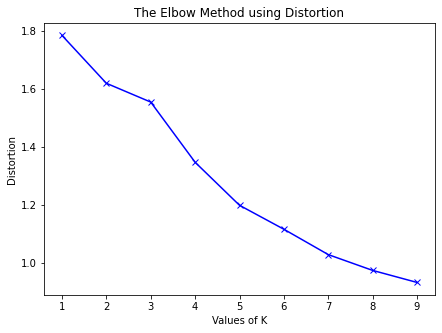

In [78]:
plt.figure(figsize=(7,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

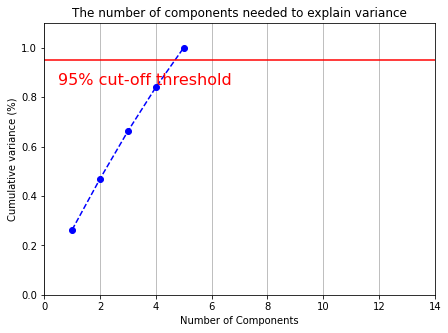

In [79]:
from sklearn.decomposition import PCA

pca = PCA().fit(numeric_df)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)

fig, ax = plt.subplots()
xi = np.arange(1, 6, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 15, step=2)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [80]:
#PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(numeric_df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

Text(0.5, 1.0, 'K-Means Clustering based on K=4')

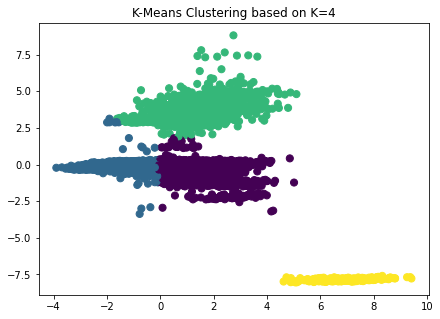

In [81]:
plt.figure(figsize=(7,5))
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(principalDf)
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c = label, s= 50, cmap = 'viridis' )
plt.title("K-Means Clustering based on K=4")

Text(0.5, 1.0, 'K-Means Clustering based on K=2')

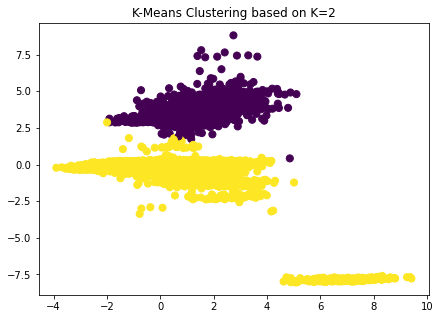

In [82]:
plt.figure(figsize=(7,5))
kmeans = KMeans(n_clusters = 2)
label = kmeans.fit_predict(principalDf)
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c = label, s= 50, cmap = 'viridis' )
plt.title("K-Means Clustering based on K=2")

Text(0.5, 1.0, 'K-Means Clustering based on K=3')

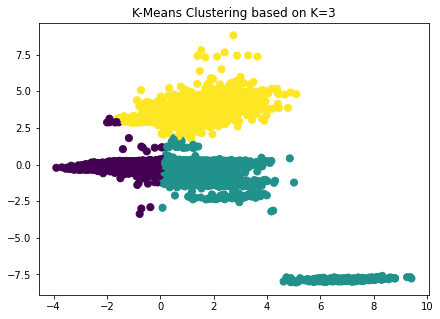

In [83]:
plt.figure(figsize=(7,5))
kmeans = KMeans(n_clusters = 3)
label = kmeans.fit_predict(principalDf)
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c = label, s= 50, cmap = 'viridis' )
plt.title("K-Means Clustering based on K=3")

In [84]:
type(numeric_df)

numpy.ndarray

In [85]:
numeric_df.shape

(45175, 5)

In [86]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [87]:
numeric_df, true_labels = make_blobs(n_samples=200, centers=3, cluster_std=2.75, random_state=None)

In [88]:
true_labels[:20]

array([0, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 0, 1])

In [89]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_df)

In [90]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)

In [91]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [92]:
kmeans.inertia_

152.25479551251465

In [93]:
kmeans.cluster_centers_

array([[-0.85986171, -0.76057822],
       [-0.22330467,  1.02768416],
       [ 1.10922279, -0.24405812]])

In [94]:
kmeans.n_iter_

8

In [95]:
kmeans.labels_[:5]

array([2, 0, 1, 2, 1])

In [96]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
 kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
 kmeans.fit(scaled_features)
 sse.append(kmeans.inertia_)

C:\Users\akith\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


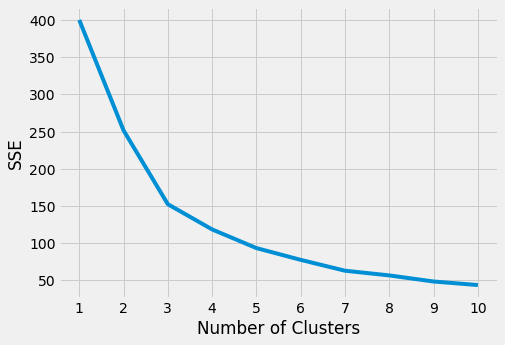

In [97]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [98]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

In [99]:
kl.elbow

3

In [100]:
 # A list holds the silhouette coefficients for each k
silhouette_coefficients = []
 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

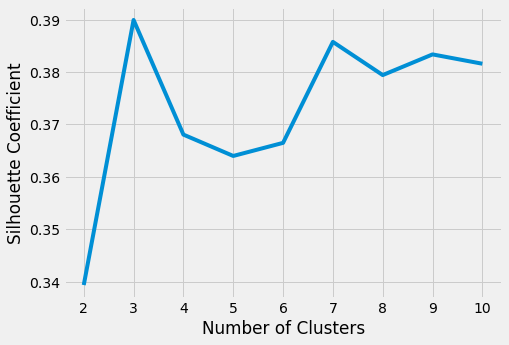

In [101]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [102]:
# Fit the algorithms to the features
kmeans.fit(scaled_features)
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)

In [103]:
kmeans_silhouette

0.38

**DECISION TREES**

**1. Decision Tree wrt GINI**

In [104]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [105]:
pip install graphviz

In [106]:
dt_numeric = df[['age','educational-num','hours-per-week','workclass']]

In [107]:
dt_numeric.to_csv("dt_numeric.csv", index = False)

In [108]:
dt_numeric

age  educational-num  hours-per-week     workclass
0       25                7              40       Private
1       38                9              50       Private
2       28               12              40     Local-gov
3       44               10              40       Private
5       34                6              30       Private
...    ...              ...             ...           ...
48837   27               12              38       Private
48838   40                9              40       Private
48839   58                9              40       Private
48840   22                9              20       Private
48841   52                9              40  Self-emp-inc

[45175 rows x 4 columns]

In [109]:
import sklearn
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [110]:
X_train, X_test, y_train, y_test = train_test_split(dt_numeric.iloc[:,:-1], dt_numeric.iloc[:, -1], test_size=0.3)

In [111]:
X_train

age  educational-num  hours-per-week
27149   29               10              40
28148   26                9              40
9422    23               10              20
9209    24                9              40
40915   39               11              40
...    ...              ...             ...
30289   43               13              40
21195   35                9              40
13262   40                9              45
44880   31               13              55
46748   32                9              40

[31622 rows x 3 columns]

In [112]:
X_test

age  educational-num  hours-per-week
40629   39                9              40
14595   39               13              40
5247    34               13              47
22970   36                9              60
34485   56                9              40
...    ...              ...             ...
6168    37               16              40
7678    25               13              40
36328   48               14              40
47369   23                2              36
44821   47               10              40

[13553 rows x 3 columns]

In [113]:
model_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=3)
model_gini.fit(X_train, y_train)
predictions = model_gini.predict(X_test)
predictions[1:10]

array(['Private', 'Private', 'Private', 'Private', 'Private', 'Private',
       'Private', 'Private', 'Private'], dtype=object)

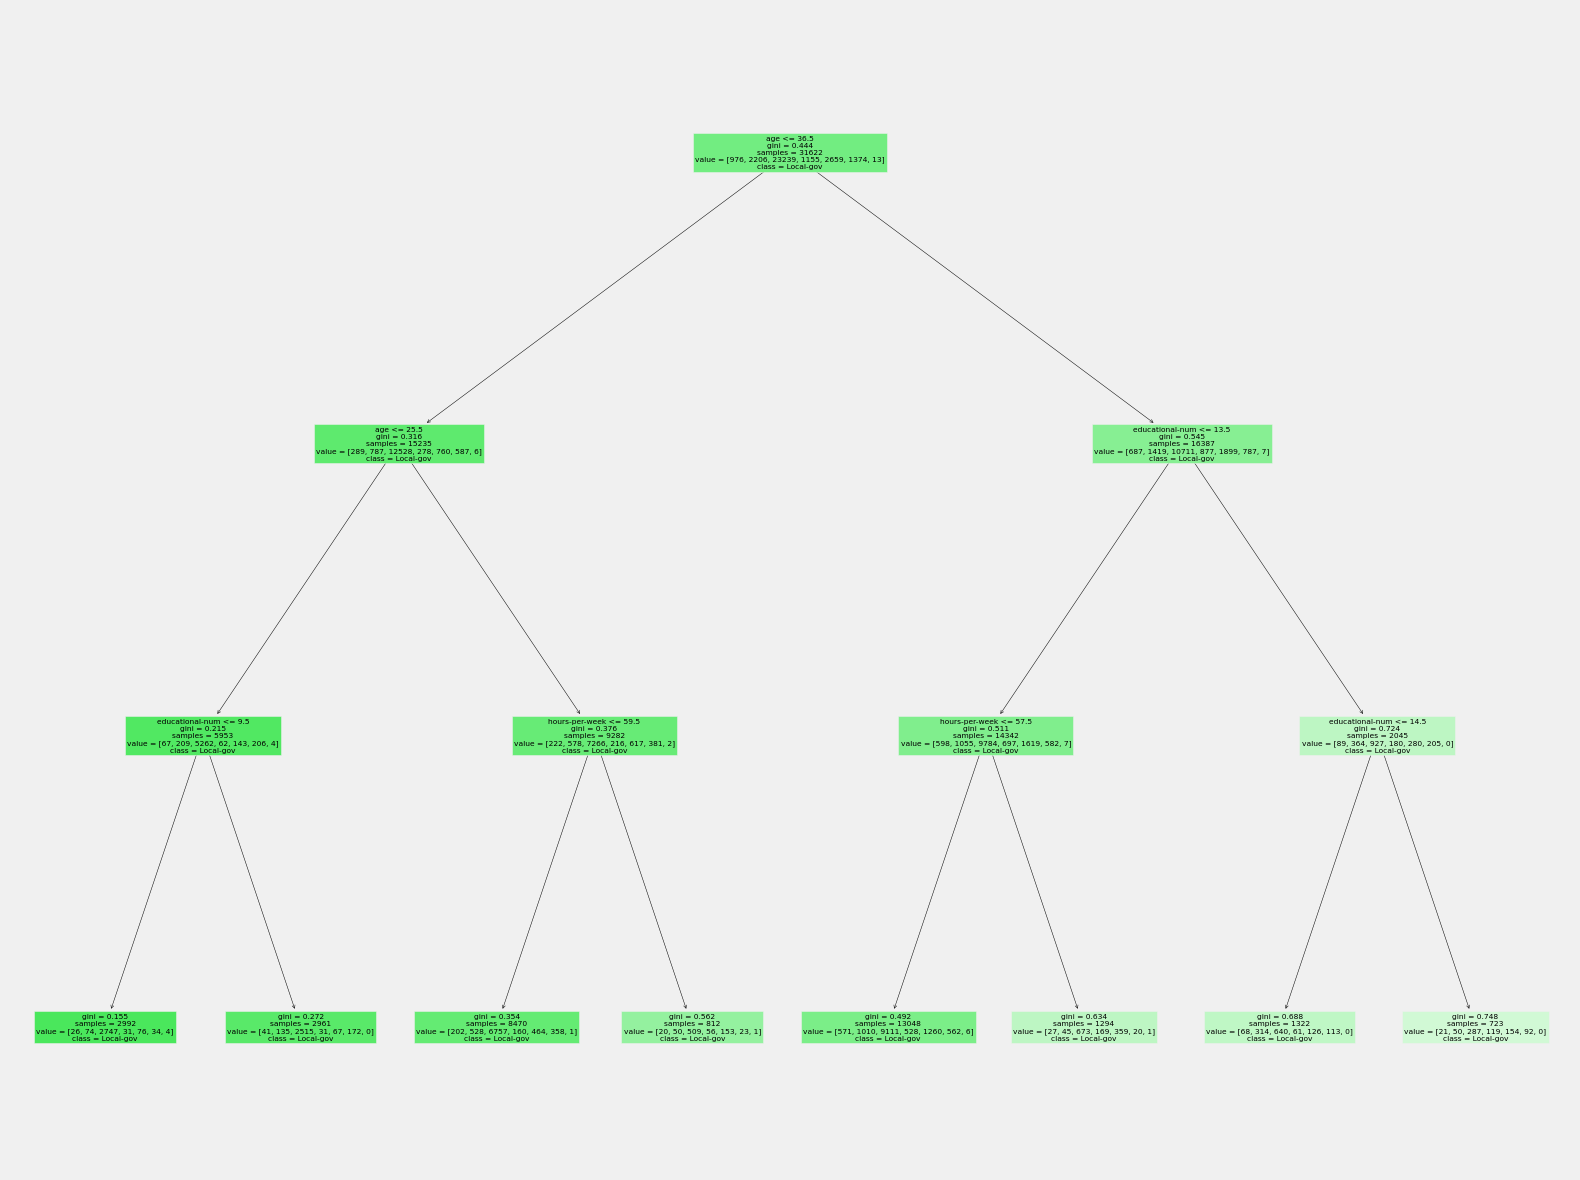

In [114]:
# Visualizing the decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_gini, feature_names=dt_numeric.iloc[:,:-1].columns, class_names=dt_numeric['workclass'], filled = True)
fig.savefig("Decision_tree_Gini.png")

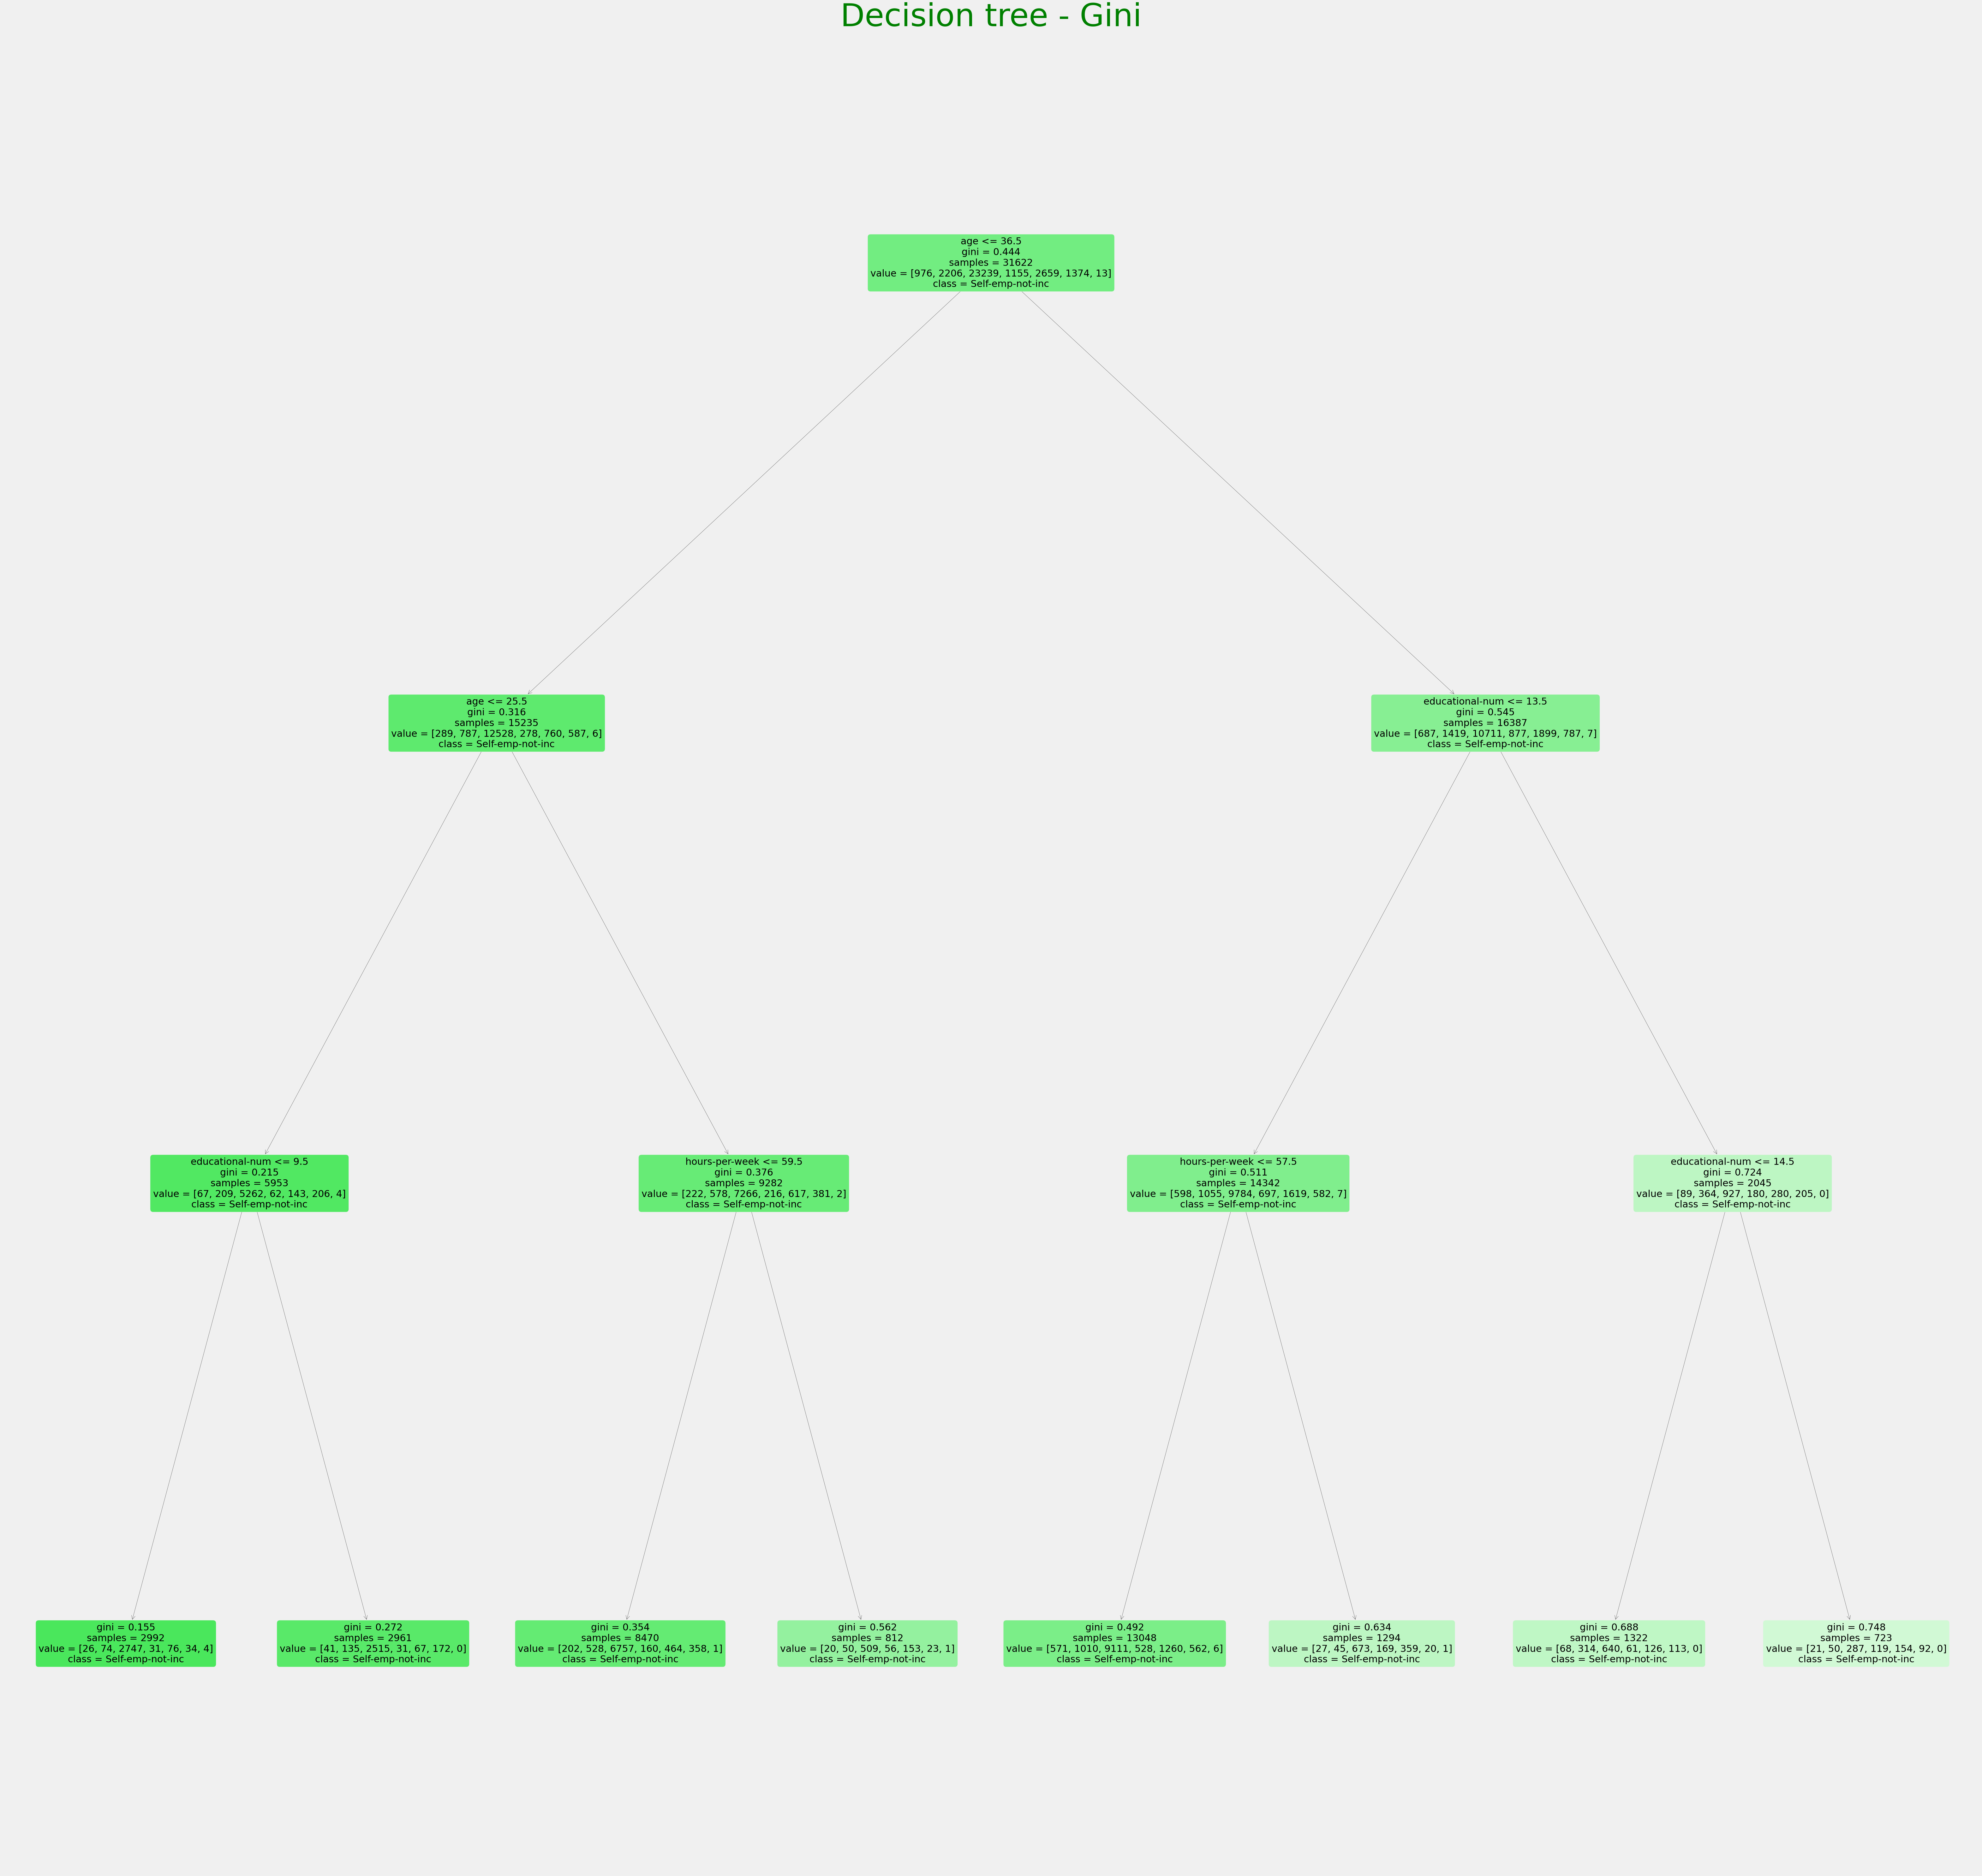

In [115]:
# Visualizing the decision tree
#fig = plt.figure(figsize=(25,30))
#_ = tree.plot_tree(model_gini, feature_names=dt_numeric.iloc[:,:-1].columns, class_names=dt_numeric['workclass'], filled = True)
feature_names = dt_numeric.columns[:6]
target_names = dt_numeric['workclass'].unique().tolist()
plt.figure(figsize=(100,100))
plot_tree(model_gini, feature_names = feature_names, class_names = target_names, filled = True, rounded = True)
plt.title(label="Decision tree - Gini",fontsize=100,color="green")
plt.savefig('DT - Gini .png')

In [116]:
#fig.savefig("decistion_tree_Gini.png")

In [117]:
# Deriving confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test, predictions))
print ("Accuracy : ", accuracy_score(y_test,predictions)*100)      
print("Report : ", classification_report(y_test, predictions))

Confusion Matrix: 
 [[    0     0   430     0     0     0     0]
 [    0     0   894     0     0     0     0]
 [    0     0 10023     0     0     0     0]
 [    0     0   490     0     0     0     0]
 [    0     0  1136     0     0     0     0]
 [    0     0   572     0     0     0     0]
 [    0     0     8     0     0     0     0]]
Accuracy :  73.95410610197004


C:\Users\akith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report :                    precision    recall  f1-score   support

     Federal-gov       0.00      0.00      0.00       430
       Local-gov       0.00      0.00      0.00       894
         Private       0.74      1.00      0.85     10023
    Self-emp-inc       0.00      0.00      0.00       490
Self-emp-not-inc       0.00      0.00      0.00      1136
       State-gov       0.00      0.00      0.00       572
     Without-pay       0.00      0.00      0.00         8

        accuracy                           0.74     13553
       macro avg       0.11      0.14      0.12     13553
    weighted avg       0.55      0.74      0.63     13553



C:\Users\akith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


References :- https://scikit-learn.org/stable/modules/tree.html https://www.geeksforgeeks.org/decision-tree-implementation-python/

**2. Decision Tree wrt ENTROPY**

In [118]:
# Decision Tree modelling based on ENTROPY
model_entropy = DecisionTreeClassifier(criterion = "entropy",random_state = 100,max_depth=3, min_samples_leaf=3)
model_entropy.fit(X_train, y_train)
predictions = model_entropy.predict(X_test)
predictions[1:10]

array(['Private', 'Private', 'Private', 'Private', 'Private', 'Private',
       'Private', 'Private', 'Private'], dtype=object)

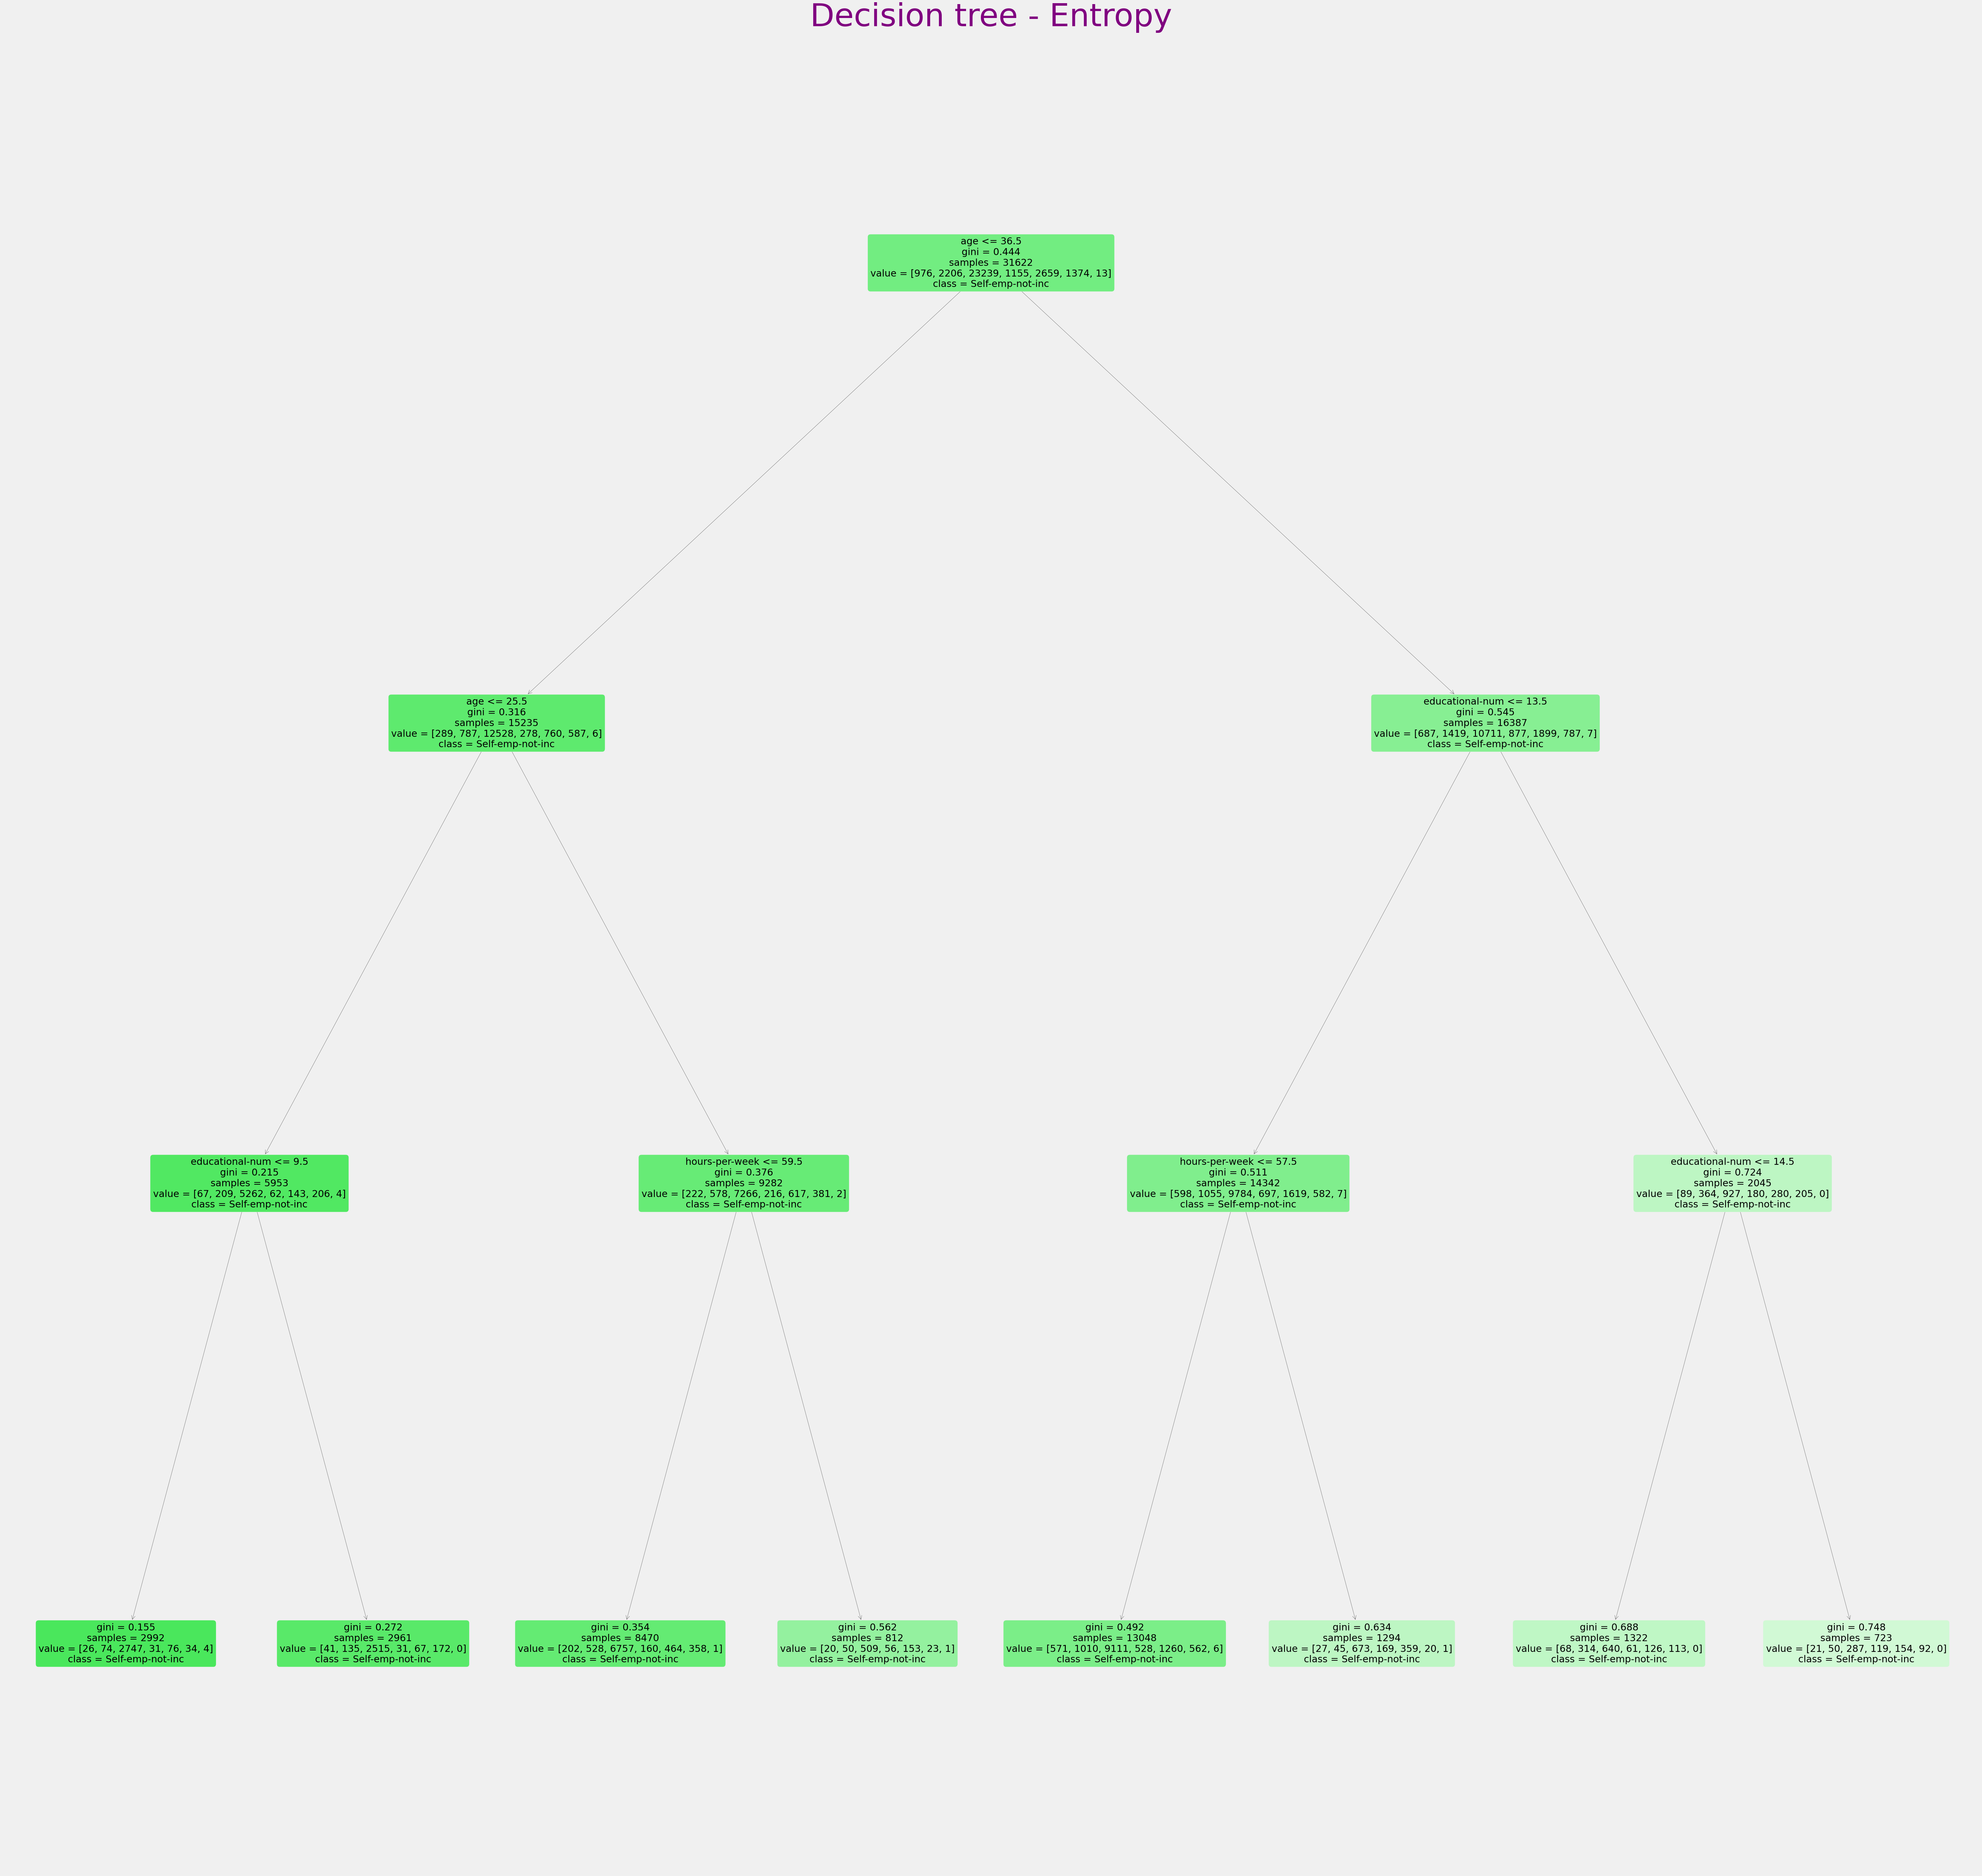

In [119]:
# Visualizing the decision tree
#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(model_entropy, feature_names=dt_numeric.iloc[:,:-1].columns, class_names=dt_numeric['workclass'], filled = True)
feature_names = dt_numeric.columns[:6]
target_names = dt_numeric['workclass'].unique().tolist()
plt.figure(figsize=(100,100))
plot_tree(model_gini, feature_names = feature_names, class_names = target_names, filled = True, rounded = True)
plt.title(label="Decision tree - Entropy",fontsize=100,color="purple")
plt.savefig('DT - Entropy .png')

In [120]:
# Deriving confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test, predictions))
print ("Accuracy : ", accuracy_score(y_test,predictions)*100)      
print("Report : ", classification_report(y_test, predictions))

Confusion Matrix: 
 [[    0     0   430     0     0     0     0]
 [    0     0   894     0     0     0     0]
 [    0     0 10023     0     0     0     0]
 [    0     0   490     0     0     0     0]
 [    0     0  1136     0     0     0     0]
 [    0     0   572     0     0     0     0]
 [    0     0     8     0     0     0     0]]
Accuracy :  73.95410610197004


C:\Users\akith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report :                    precision    recall  f1-score   support

     Federal-gov       0.00      0.00      0.00       430
       Local-gov       0.00      0.00      0.00       894
         Private       0.74      1.00      0.85     10023
    Self-emp-inc       0.00      0.00      0.00       490
Self-emp-not-inc       0.00      0.00      0.00      1136
       State-gov       0.00      0.00      0.00       572
     Without-pay       0.00      0.00      0.00         8

        accuracy                           0.74     13553
       macro avg       0.11      0.14      0.12     13553
    weighted avg       0.55      0.74      0.63     13553



C:\Users\akith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


References :- https://scikit-learn.org/stable/modules/tree.html https://www.geeksforgeeks.org/decision-tree-implementation-python/

**3. Decision Tree With Different Root Node**

In [121]:
dt_num = df[['age', 'educational-num','capital-gain', 'capital-loss','hours-per-week','workclass']]

In [122]:
dt_num.to_csv("dt_num.csv", index = False)

In [123]:
dt_num

age  educational-num  capital-gain  capital-loss  hours-per-week  \
0       25                7             0             0              40   
1       38                9             0             0              50   
2       28               12             0             0              40   
3       44               10          7688             0              40   
5       34                6             0             0              30   
...    ...              ...           ...           ...             ...   
48837   27               12             0             0              38   
48838   40                9             0             0              40   
48839   58                9             0             0              40   
48840   22                9             0             0              20   
48841   52                9         15024             0              40   

          workclass  
0           Private  
1           Private  
2         Local-gov  
3           Private  
5           Private  
...             ...  
48837       Private  
48838       Private  
48839       Private  
48840       Private  
48841  Self-emp-inc  

[45175 rows x 6 columns]

In [124]:
X_train, X_test, y_train, y_test = train_test_split(dt_numeric.iloc[:,:-1], dt_numeric.iloc[:, -1], test_size=0.3)

In [125]:
X_train

age  educational-num  hours-per-week
31855   74                2              20
38811   21                9              40
10247   20               10               4
21606   29                4              30
41055   51                9              40
...    ...              ...             ...
31474   22                9              40
42965   36               13              40
12177   34               11              40
31488   19                9              40
17569   37               13              45

[31622 rows x 3 columns]

In [126]:
X_test

age  educational-num  hours-per-week
8532    62               16              50
14990   34                9              55
11555   28               13              40
48304   53                8              40
33238   31                2              35
...    ...              ...             ...
273     46               14              38
34785   32               10              40
11942   67                9              40
28032   45               10              50
15772   54                9              38

[13553 rows x 3 columns]

In [127]:
feature_names = dt_num.columns[:6]
target_names = dt_num['workclass'].unique().tolist()

In [128]:
model_gini = DecisionTreeClassifier(criterion = "entropy",random_state = 100,max_depth=3, min_samples_leaf=3)
model_gini.fit(X_train, y_train)
predictions = model_gini.predict(X_test)
predictions[1:10]

array(['Private', 'Private', 'Private', 'Private', 'Private', 'Private',
       'Private', 'Private', 'Private'], dtype=object)

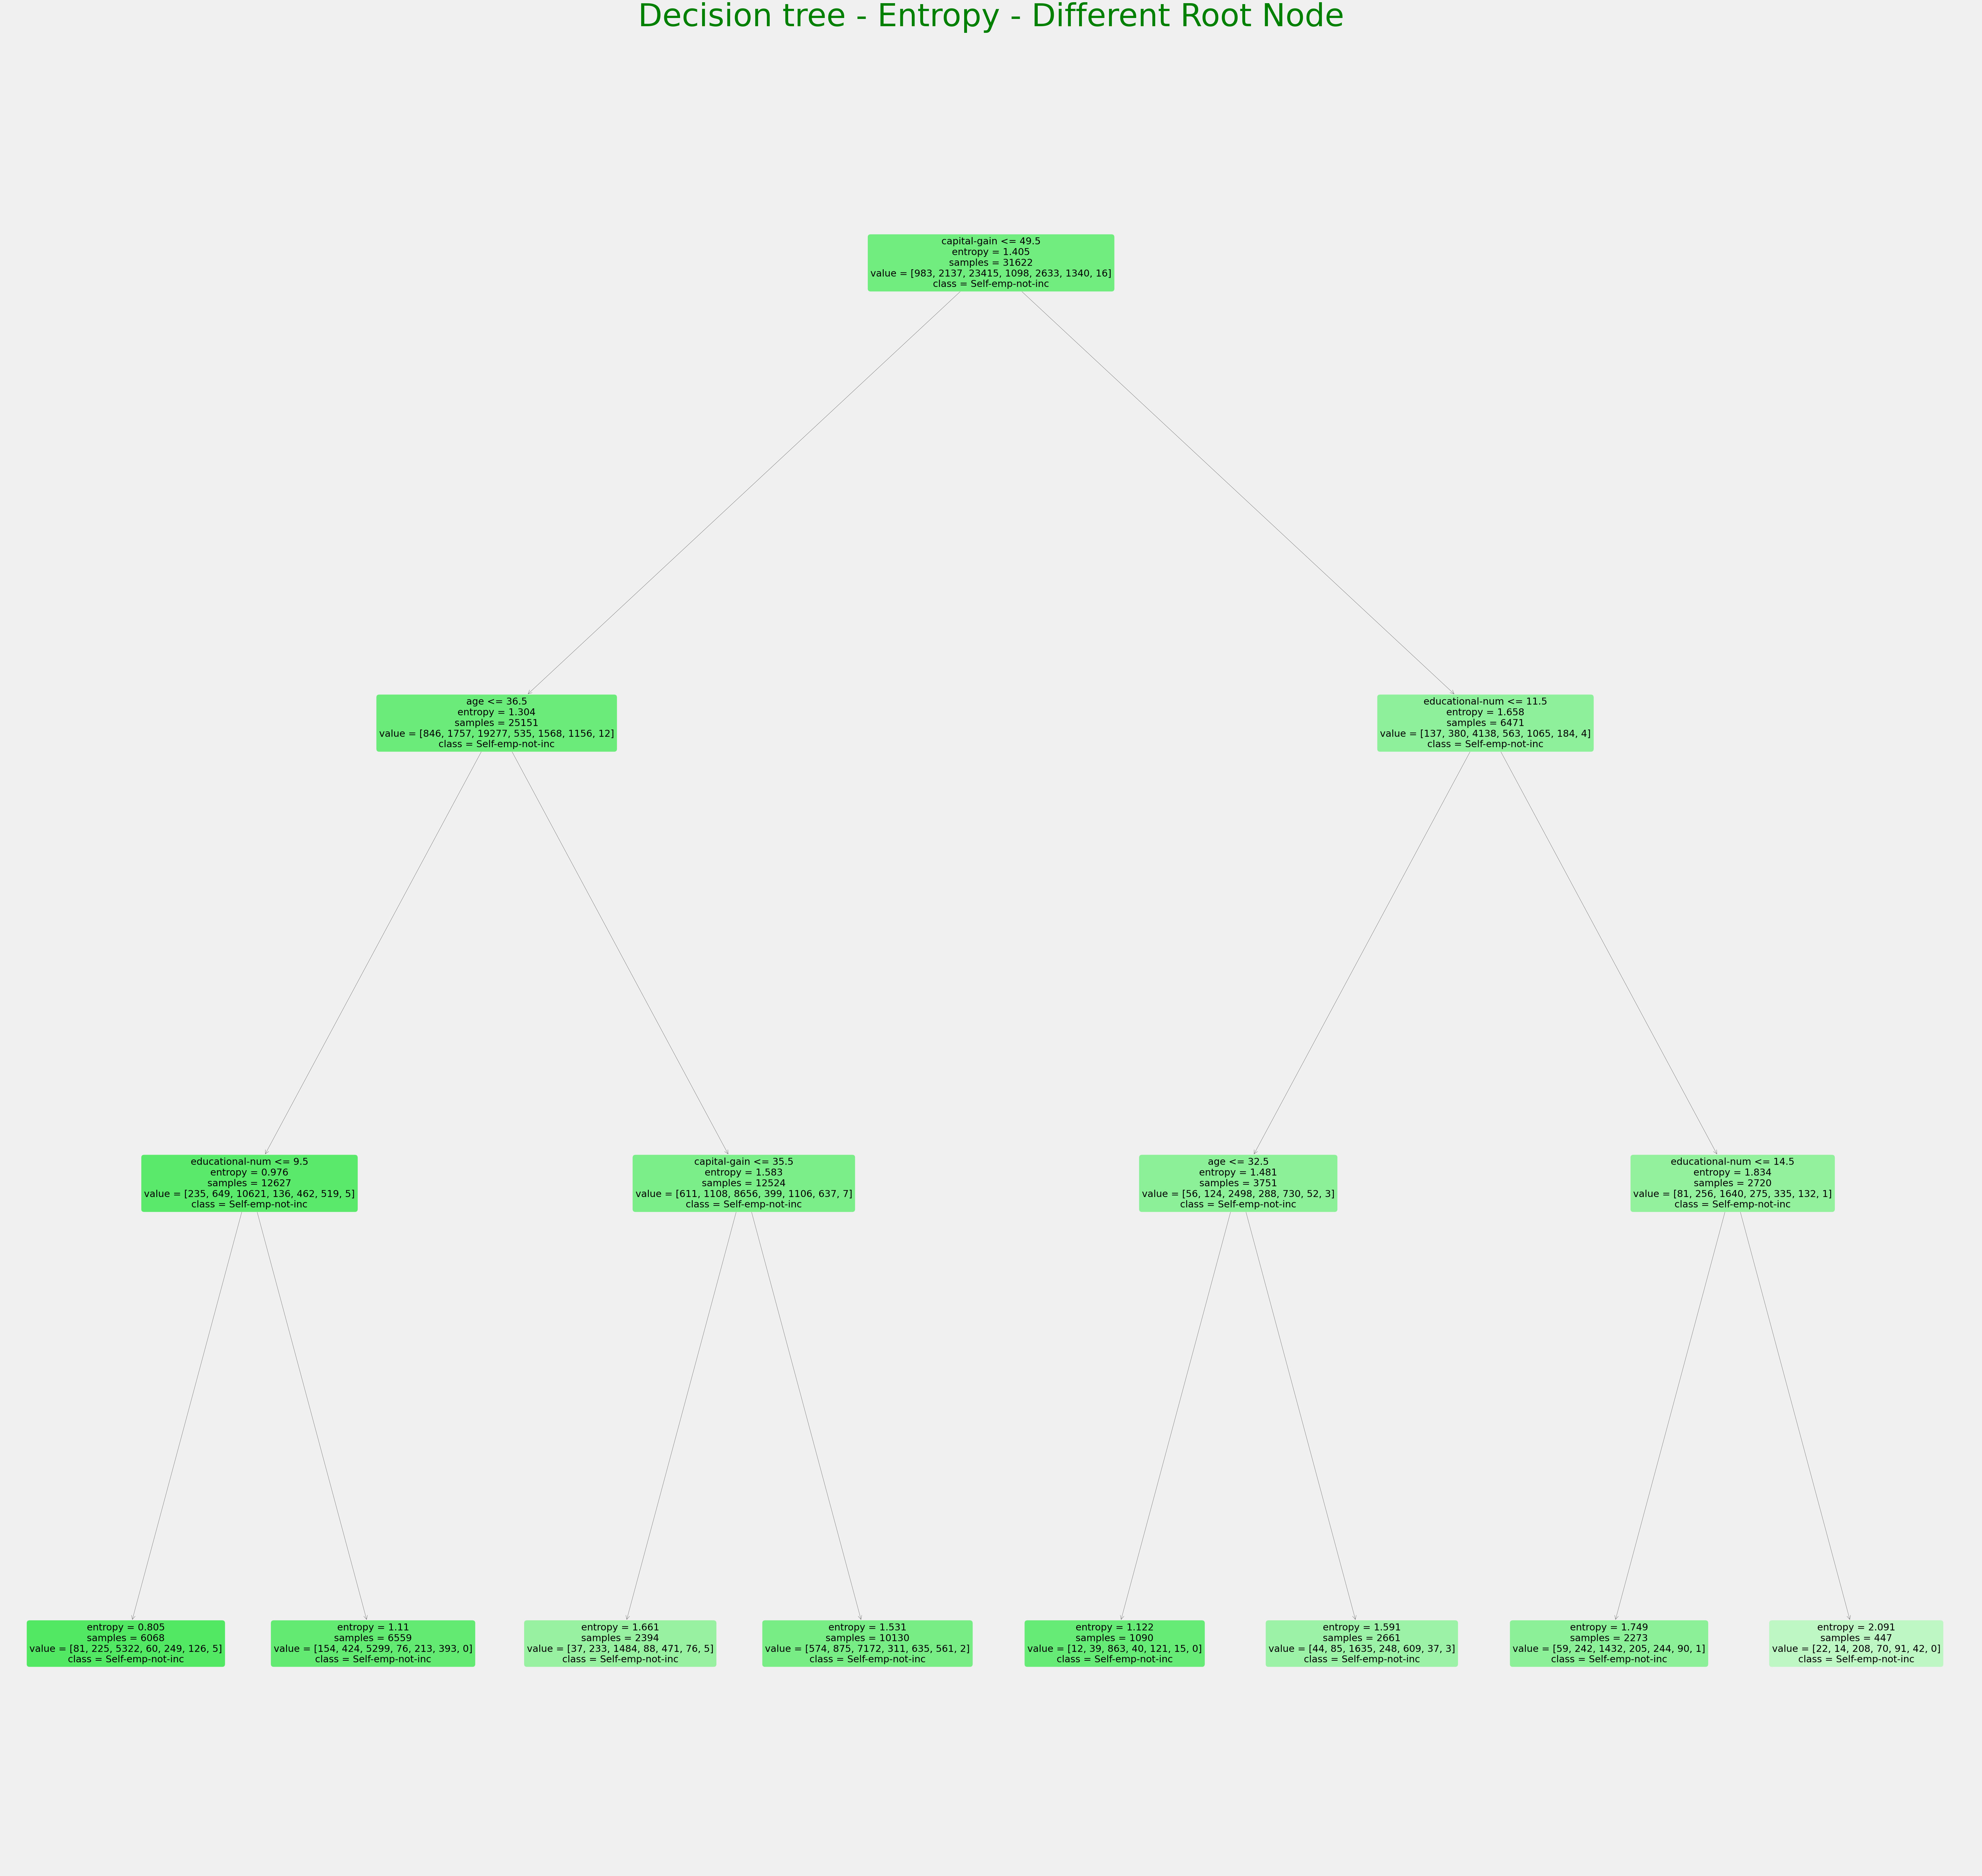

In [129]:
plt.figure(figsize=(100,100))
plot_tree(model_gini, #model
          feature_names = feature_names,  #features
          class_names = target_names, #labels
          filled = True, 
          rounded = True)
plt.title(label="Decision tree - Entropy - Different Root Node",
          fontsize=100,
          color="green")
plt.savefig('DT - Entropy - Different Root Node.png')

In [130]:
# Deriving confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test, predictions))
print ("Accuracy : ", accuracy_score(y_test,predictions)*100)      
print("Report : ", classification_report(y_test, predictions))

Confusion Matrix: 
 [[   0    0  423    0    0    0    0]
 [   0    0  963    0    0    0    0]
 [   0    0 9847    0    0    0    0]
 [   0    0  547    0    0    0    0]
 [   0    0 1162    0    0    0    0]
 [   0    0  606    0    0    0    0]
 [   0    0    5    0    0    0    0]]
Accuracy :  72.65550062716741


C:\Users\akith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report :                    precision    recall  f1-score   support

     Federal-gov       0.00      0.00      0.00       423
       Local-gov       0.00      0.00      0.00       963
         Private       0.73      1.00      0.84      9847
    Self-emp-inc       0.00      0.00      0.00       547
Self-emp-not-inc       0.00      0.00      0.00      1162
       State-gov       0.00      0.00      0.00       606
     Without-pay       0.00      0.00      0.00         5

        accuracy                           0.73     13553
       macro avg       0.10      0.14      0.12     13553
    weighted avg       0.53      0.73      0.61     13553



C:\Users\akith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 **SUPPORT VECTOR MACHINE**

In [131]:
svm_numeric = dt_numeric

In [132]:
svm_numeric.head()

age  educational-num  hours-per-week  workclass
0   25                7              40    Private
1   38                9              50    Private
2   28               12              40  Local-gov
3   44               10              40    Private
5   34                6              30    Private

In [133]:
svm_numeric.to_csv("numeric_with_label.csv", index = False)

In [134]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#perform standardization by centering and scaling
scaler = StandardScaler()

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(svm_numeric.iloc[:,:-1], svm_numeric.iloc[:, -1], test_size=0.3)


In [135]:
X_train

age  educational-num  hours-per-week
8390    40               10              40
9606    29               13              40
14741   44               10              40
36648   32               13              50
3653    50               13              40
...    ...              ...             ...
18542   27               13              50
41807   56               10              40
43668   30               10              40
48314   70                9              40
44807   28                9              70

[31622 rows x 3 columns]

In [136]:
X_test

age  educational-num  hours-per-week
5781    39                9              40
32126   46                9              37
45498   22                9              40
3400    24                9              35
13130   20                9              40
...    ...              ...             ...
17815   50               10              40
13415   36               14              35
16068   59               15              84
34467   51                9              40
35613   26                5              45

[13553 rows x 3 columns]

In [137]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**SVM Linear**

In [138]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', C = 0.7) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy and confusion matrix  calculation
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion Matrix
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[    0     0   421     0     0     0     0]
 [    0     0   881     0     0     0     0]
 [    0     0 10010     0     0     0     0]
 [    0     0   531     0     0     0     0]
 [    0     0  1130     0     0     0     0]
 [    0     0   572     0     0     0     0]
 [    0     0     8     0     0     0     0]]
Accuracy: 0.7385818637939939


In [139]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', C = 1.5) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy and confusion matrix  calculation
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion Matrix
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[    0     0   421     0     0     0     0]
 [    0     0   881     0     0     0     0]
 [    0     0 10010     0     0     0     0]
 [    0     0   531     0     0     0     0]
 [    0     0  1130     0     0     0     0]
 [    0     0   572     0     0     0     0]
 [    0     0     8     0     0     0     0]]
Accuracy: 0.7385818637939939


**SVM Radial**

In [140]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Radial Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy and confusion matrix calculation
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion Matrix
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[    0     0   421     0     0     0     0]
 [    0     0   881     0     0     0     0]
 [    0     0 10006     0     4     0     0]
 [    0     0   531     0     0     0     0]
 [    0     0  1126     0     4     0     0]
 [    0     0   572     0     0     0     0]
 [    0     0     8     0     0     0     0]]
Accuracy: 0.7385818637939939


In [141]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf', C = 0.5) # Radial Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy and confusion matrix calculation
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion Matrix
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[    0     0   421     0     0     0     0]
 [    0     0   881     0     0     0     0]
 [    0     0 10008     0     2     0     0]
 [    0     0   531     0     0     0     0]
 [    0     0  1128     0     2     0     0]
 [    0     0   572     0     0     0     0]
 [    0     0     8     0     0     0     0]]
Accuracy: 0.7385818637939939


In [142]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf', C = 1.5) # Radial Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy and confusion matrix calculation
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion Matrix
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[    0     0   421     0     0     0     0]
 [    0     0   881     0     0     0     0]
 [    0     0 10005     0     5     0     0]
 [    0     0   531     0     0     0     0]
 [    0     0  1126     0     4     0     0]
 [    0     0   572     0     0     0     0]
 [    0     0     8     0     0     0     0]]
Accuracy: 0.7385080793920166


**SVM Polynomial**

In [143]:
#Create a svm Classifier
clf = svm.SVC(kernel='poly') # Poly Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy and confusion matrix calculation
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion Matrix
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[    0     0   421     0     0     0     0]
 [    0     0   881     0     0     0     0]
 [    0     0 10010     0     0     0     0]
 [    0     0   531     0     0     0     0]
 [    0     0  1130     0     0     0     0]
 [    0     0   572     0     0     0     0]
 [    0     0     8     0     0     0     0]]
Accuracy: 0.7385818637939939


In [144]:
#Create a svm Classifier
clf = svm.SVC(kernel='poly', C = 0.4) # Poly Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy and confusion matrix calculation
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion Matrix
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[    0     0   421     0     0     0     0]
 [    0     0   881     0     0     0     0]
 [    0     0 10010     0     0     0     0]
 [    0     0   531     0     0     0     0]
 [    0     0  1130     0     0     0     0]
 [    0     0   572     0     0     0     0]
 [    0     0     8     0     0     0     0]]
Accuracy: 0.7385818637939939


In [145]:
#Create a svm Classifier
clf = svm.SVC(kernel='poly', C = 1.7) # Poly Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy and confusion matrix calculation
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion Matrix
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[    0     0   421     0     0     0     0]
 [    0     0   881     0     0     0     0]
 [    0     0 10010     0     0     0     0]
 [    0     0   531     0     0     0     0]
 [    0     0  1130     0     0     0     0]
 [    0     0   572     0     0     0     0]
 [    0     0     8     0     0     0     0]]
Accuracy: 0.7385818637939939
